<a href="https://colab.research.google.com/github/Stanslusokurut/Sales-Prediction/blob/main/Stanslus_Logistic_Regression_RF_or_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
# Load and explore the dataset
filename = '/content/drive/MyDrive/Data Science/Datasets/Machine Learning Data/wisconsinBreastCancer.csv'
df = pd.read_csv(filename)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
#Most Important [Few false positives]
#Second Important [Most True positives]

Logistics Regression

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [17]:
#Convert Target to Numeric Values
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

Text(0.5, 0, 'concave points_worst')

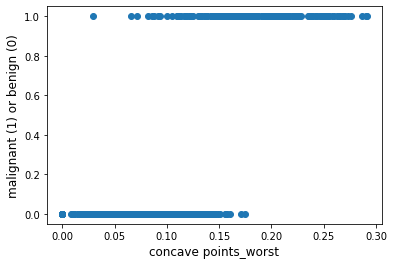

In [18]:
plt.scatter(df['concave points_worst'], df['diagnosis'])
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize = 12)

In [19]:
# Assign feature matrix and target vector
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis'] 
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.9859154929577465
0.9790209790209791


{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 0.1: 0.972027972027972,
 1: 0.972027972027972,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

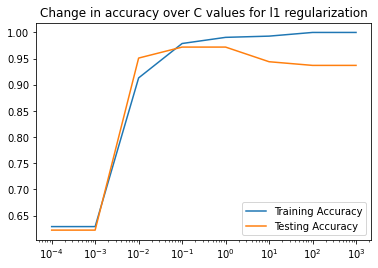

In [22]:
#L1 Fitting to the model
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


In [ ]:
#Best accuracy is when c = 0.1 wherewe get an accuracy of 0.972

L2 Tuning

{0.0001: 0.951048951048951,
 0.001: 0.951048951048951,
 0.01: 0.9790209790209791,
 0.1: 0.993006993006993,
 1: 0.9790209790209791,
 10: 0.972027972027972,
 100: 0.951048951048951,
 1000: 0.9370629370629371}

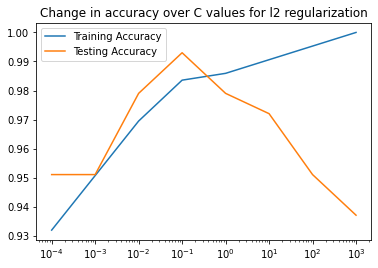

In [23]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


In [ ]:
# Best score is at 0.1 and after that it falls way off

**KNN**

In [27]:
#Define scaler & Run with 1 Neighbour
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=1)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
predictions
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.951048951048951

In [ ]:
#Accuracy of 95%, less than that for the logistics regression

In [28]:
#Define scaler & Run with 2 Neighbours
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=2)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
predictions
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.958041958041958

In [29]:
#Define scaler & Run with 5 Neighbours
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=5)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
predictions
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.958041958041958

In [30]:
#Define scaler & Run with 10 Neighbours
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=10)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
predictions
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.965034965034965

In [32]:
#Define scaler & Run with 15 Neighbours
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=15)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
predictions
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.965034965034965

In [34]:
#Define scaler & Run with 8 Neighbours
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=8)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
predictions
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.965034965034965

In [ ]:
#Best Score is with 8 neighbours at 96.5% less than that of the logistics regression 

In [ ]:
#CONFIRM THE BEST MODEL USING KNN & GRID SEARCH

In [39]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params()
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,20),
              'kneighborsclassifier__p': range(1,20),
              'kneighborsclassifier__weights': ['distance','uniform']}



In [40]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)
 
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.958041958041958


In [ ]:
#Nearest Neighbour code runs very slow

RANDOM FORESTS

In [56]:
# Import random forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [57]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [60]:
#Predict Values of y
rf.predict(X_test)

array([0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.78, 0.83, 0.12, 0.11,
       1.  , 0.03, 0.87, 0.03, 1.  , 0.01, 0.  , 0.  , 1.  , 0.19, 0.  ,
       1.  , 0.  , 0.  , 0.03, 0.  , 0.16, 0.  , 1.  , 0.  , 0.  , 0.33,
       0.02, 0.  , 0.  , 0.75, 0.01, 1.  , 0.04, 0.  , 1.  , 0.  , 0.  ,
       0.33, 0.  , 0.19, 0.08, 0.  , 0.  , 0.99, 1.  , 0.18, 0.06, 0.  ,
       0.01, 0.  , 1.  , 0.92, 0.  , 0.  , 1.  , 1.  , 0.03, 0.  , 0.04,
       1.  , 0.99, 0.  , 0.06, 0.96, 1.  , 0.  , 1.  , 0.  , 0.05, 0.01,
       0.38, 0.  , 0.13, 0.98, 0.  , 0.14, 1.  , 0.86, 1.  , 0.92, 1.  ,
       0.02, 0.  , 0.  , 0.3 , 0.26, 0.12, 0.  , 0.  , 1.  , 1.  , 0.  ,
       1.  , 0.95, 0.  , 0.96, 1.  , 0.01, 0.  , 0.  , 1.  , 0.76, 0.1 ,
       1.  , 0.  , 0.12, 1.  , 0.34, 1.  , 0.  , 0.09, 0.05, 1.  , 0.45,
       0.  , 0.  , 1.  , 0.02, 1.  , 1.  , 0.  , 0.  , 1.  , 0.83, 1.  ,
       0.13, 0.02, 0.3 , 0.86, 0.63, 0.  , 0.4 , 0.95, 0.  , 1.  , 0.  ])

In [61]:
#EValuate perfomance of the model
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)
#The untuned score of the random forests is higher than that of the decision trees [the maximum R2 value after tuning the simple decsion tree was 0.774 ]

0.9763468590591347
0.8561877028714108


In [63]:
#TUNE THE RF MODEL
#Let us loop and find R2s for the model at differnet depths to find the most probable depth 
depths = range(1, 50)
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

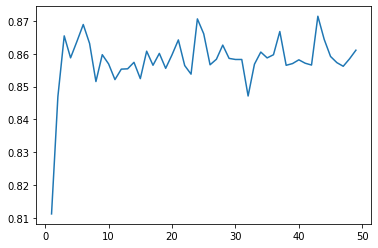

In [64]:
#Visualize our results
plt.plot(scores['Test Score'])   

In [65]:
#Sort and show whihc depth producedthe best scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()
#14 provided the highest test score

,Test Score,Train Score
43,0.87141,0.977736
24,0.870604,0.977810
6,0.868892,0.976194
37,0.866759,0.978639
25,0.866063,0.976998


In [ ]:
# Depth of 6 produces the best score

**HYPARAMETERS TUNED **

In [ ]:
#Random forests  = depth 
#Nearest Neighbours = Number of Neighbours 
#Logistic regression = The levels of C

**FINAL MODEL CHOICE**

In [ ]:
#Logistic regression becuase of a better preduction, easire to tune and does not require a lot of computer resources 
#Random Forests is undesirable as it predicts teh outcome in a continous form yet the test features are only either 1 or Zero

In [66]:
#END OF COURSEWORK